# Importing modules

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's a building blocks of neural network
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

1.12.1+cu116


# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [198]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making predictions and evaluating  a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating  a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representations.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [199]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# Linear reggresion y = ax + b
y = weight * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [200]:
# Lenght of X and y
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [201]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data ?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data compares predections.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Are there predictions? 
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions data')

    # Show the legend
    plt.legend(prop={'size': 14})

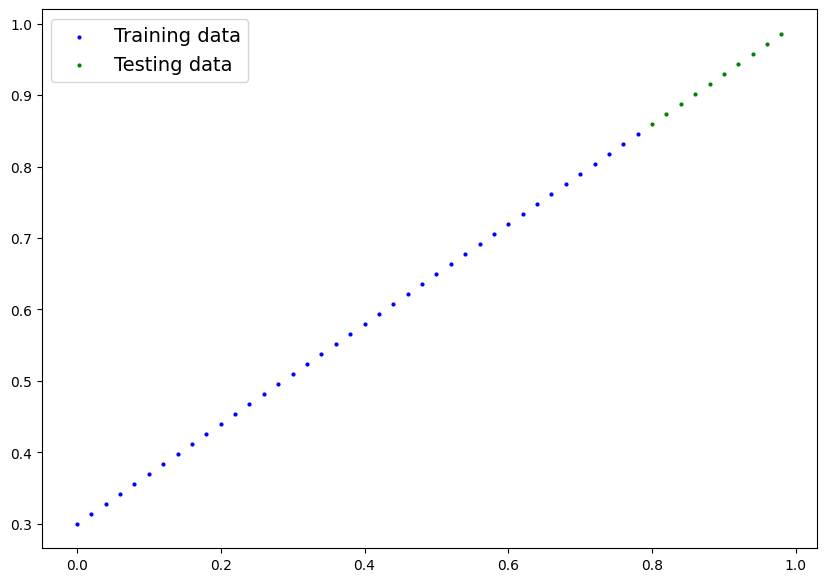

In [203]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How deas it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [204]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module

    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn wille set this for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happend in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside out model using `.parameters().`

In [205]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [206]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [207]:
# make predictions with model
with torch.inference_mode(): # <- Let's us turn off grad_tracking. It replacing no_grad()
    y_preds = model_0(X_test)

# This is the same like above, but inference_mode() is preffer
# with torch.no_grad():
    # y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

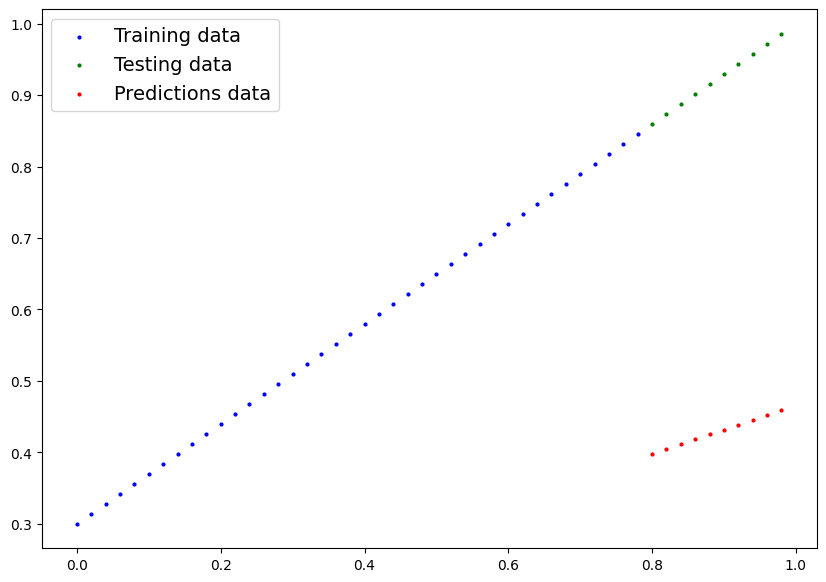

In [208]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation to the data to a better representation of the data.

One way to measure how poor or how wrong your predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our casem we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
    * Inside the optimizer you'll often have to set two parameters:
        * `params` the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [209]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [210]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [211]:
# Setup a loss function
loss_fn = nn.L1Loss() # <- This is - torch.mean(torch.abs(y_pred-y_test))

# Setup a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # <- Stochastic Gradient Descent, lr = learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use ?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and a ptimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whetrer a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [212]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1750

# Track different values
epoch_count = []
loss_values = []
test_loss_valuse = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to traininf mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2.Calculate the loss
    loss = loss_fn(y_pred, y_train) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/ batching norm)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_valuse.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")        

# Print out model state_dict()
# print(f'Loss: {loss}')
# print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [213]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

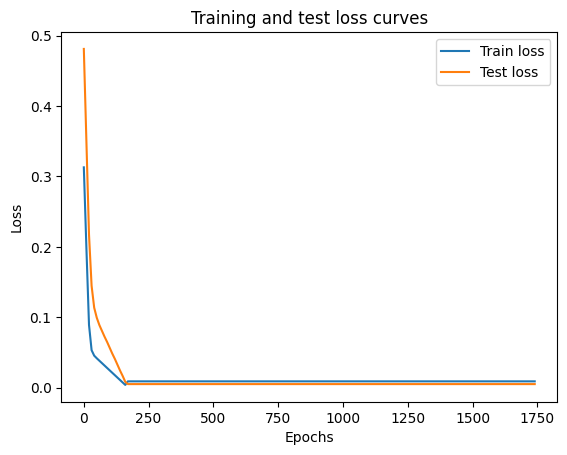

In [214]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_valuse, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

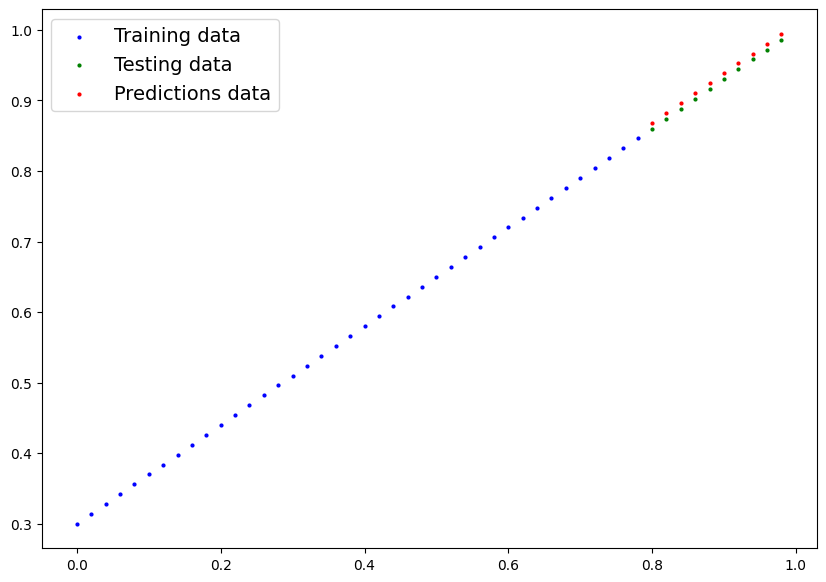

In [215]:
plot_predictions(predictions=y_preds_new)

## 4. Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [216]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## 5. Loading a PyTorch model

Since we save our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [217]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this iwll update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [218]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [219]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together


In [220]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu116'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it.

If no GPU is available, the code will default to using CPU.

In [221]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [222]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.730
bias = 0.250

# Create range values
start = 0 
end = 1
step = 0.02

# Create and X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y= weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2500],
         [0.2646],
         [0.2792],
         [0.2938],
         [0.3084],
         [0.3230],
         [0.3376],
         [0.3522],
         [0.3668],
         [0.3814]]))

In [223]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

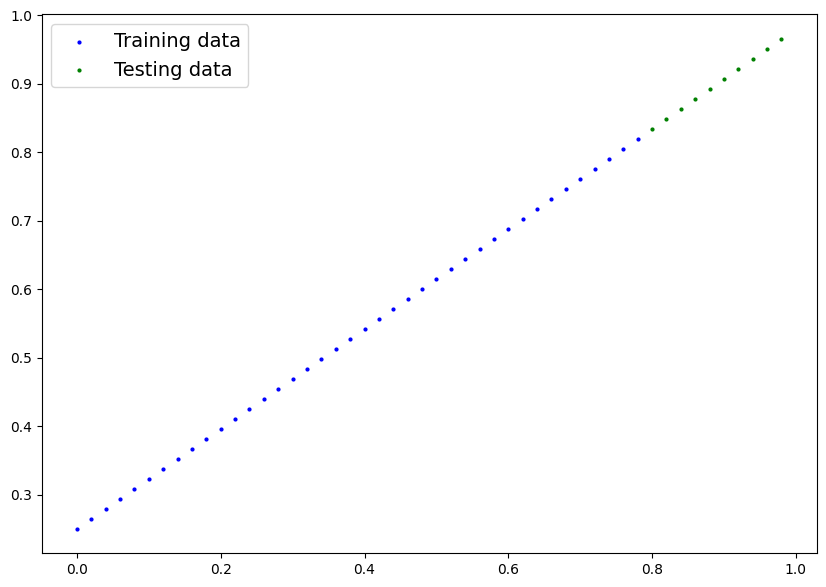

In [224]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [225]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [226]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [227]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Train model

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [228]:
# Setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [229]:
# Train loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero_grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5934779644012451 | Test loss: 0.5972762107849121
Epoch: 10 | Loss: 0.4782680571079254 | Test loss: 0.4625663757324219
Epoch: 20 | Loss: 0.3630581796169281 | Test loss: 0.32785654067993164
Epoch: 30 | Loss: 0.24784831702709198 | Test loss: 0.1931466907262802
Epoch: 40 | Loss: 0.13263843953609467 | Test loss: 0.05843687057495117
Epoch: 50 | Loss: 0.03759006783366203 | Test loss: 0.0526772141456604
Epoch: 60 | Loss: 0.02948073484003544 | Test loss: 0.06554584205150604
Epoch: 70 | Loss: 0.025985389947891235 | Test loss: 0.06002083048224449
Epoch: 80 | Loss: 0.022546585649251938 | Test loss: 0.051748283207416534
Epoch: 90 | Loss: 0.0191123578697443 | Test loss: 0.044162627309560776
Epoch: 100 | Loss: 0.01568177342414856 | Test loss: 0.03589008003473282
Epoch: 110 | Loss: 0.012242970988154411 | Test loss: 0.027617543935775757
Epoch: 120 | Loss: 0.008810426108539104 | Test loss: 0.02003188244998455
Epoch: 130 | Loss: 0.005378156900405884 | Test loss: 0.011759340763092041
Ep

In [230]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7244]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2545], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [231]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8340],
        [0.8485],
        [0.8630],
        [0.8775],
        [0.8920],
        [0.9065],
        [0.9209],
        [0.9354],
        [0.9499],
        [0.9644]], device='cuda:0')

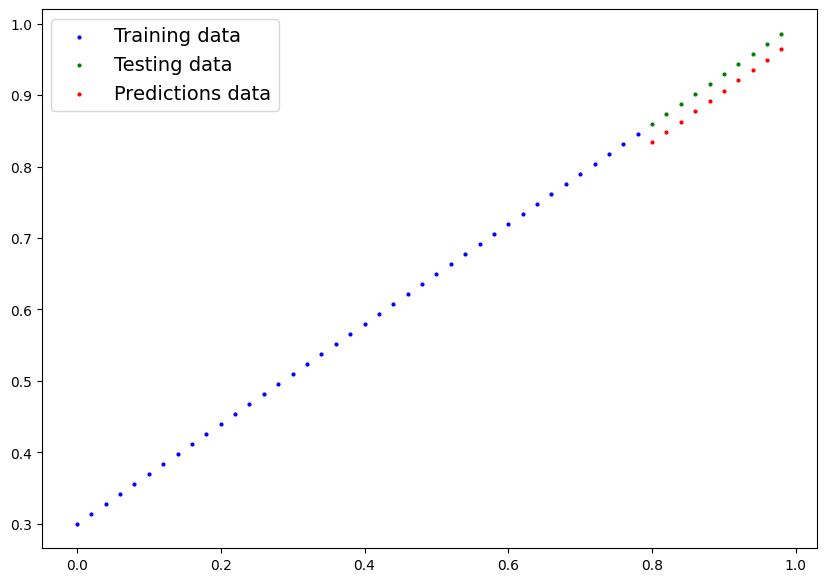

In [232]:
# Check out our model prediction on plot
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading trained model


In [233]:
# Saving our PyTorch model
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = '01_pytorch_workflow_model_1.pth'


MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [234]:
# Loading PyTorch model_0
loaded_model_0 = LinearRegressionModelV2()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7244]])),
             ('linear_layer.bias', tensor([0.2545]))])

In [235]:
# Make some predictions with our loaded model
loaded_model_0.to(device)
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercies & Extra-cirriculum



1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).

* Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

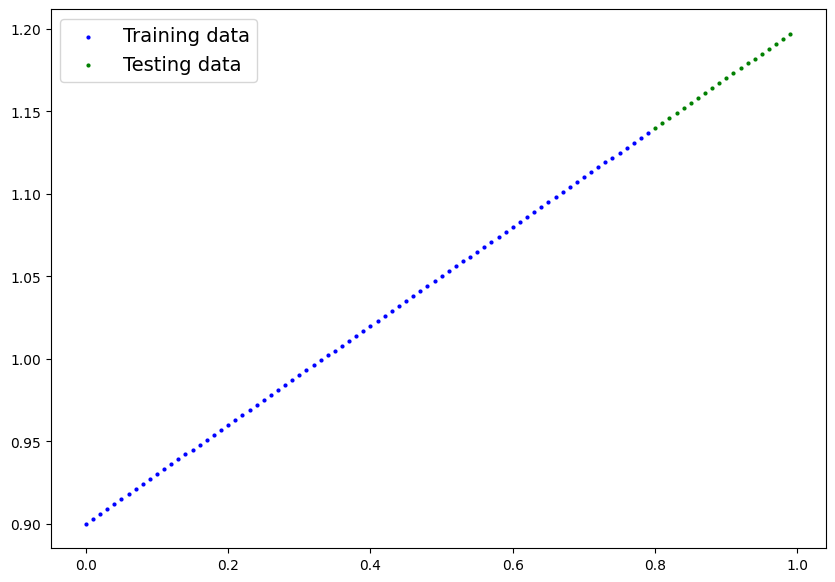

In [5]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

plot_predictions(X_train, y_train, X_test, y_test)



2. Build a PyTorch model by subclassing nn.Module.

* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.


4. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.



In [6]:
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weight = nn.Parameter(data=torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        self.bias = nn.Parameter(data=torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    def forward(self, x):
        return self.weight * x + self.bias

In [7]:
torch.manual_seed(100)
model_2 = LinearRegressionModelV3()
print(model_2.state_dict())
model_2.to(device)
print(list(model_2.parameters()))

OrderedDict([('weight', tensor([0.1117])), ('bias', tensor([0.8158]))])
[Parameter containing:
tensor([0.1117], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.8158], device='cuda:0', requires_grad=True)]


In [8]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [9]:
epochs = 300

# Put data to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_2.train()

    # 1. Forward pass
    y_pred = model_2(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero_grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### TESTING
    if epoch % 20 == 0:
        model_2.eval()
        with torch.inference_mode():
            test_pred = model_2(X_test)
            test_loss = loss_fn(test_pred, y_test)
            print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.1585494726896286 | Test Loss: 0.23918209969997406
Epoch: 20 | Loss: 0.02386314608156681 | Test Loss: 0.05840444564819336
Epoch: 40 | Loss: 0.01685260608792305 | Test Loss: 0.03899228200316429
Epoch: 60 | Loss: 0.010001415386795998 | Test Loss: 0.022664731368422508
Epoch: 80 | Loss: 0.0031492242123931646 | Test Loss: 0.006681126542389393
Epoch: 100 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 120 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 140 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 160 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 180 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 200 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 220 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 240 | Loss: 0.0024652087595313787 | Test Loss: 0.013446569442749023
Epoch: 260 | Loss: 0.0024652087595313787 |

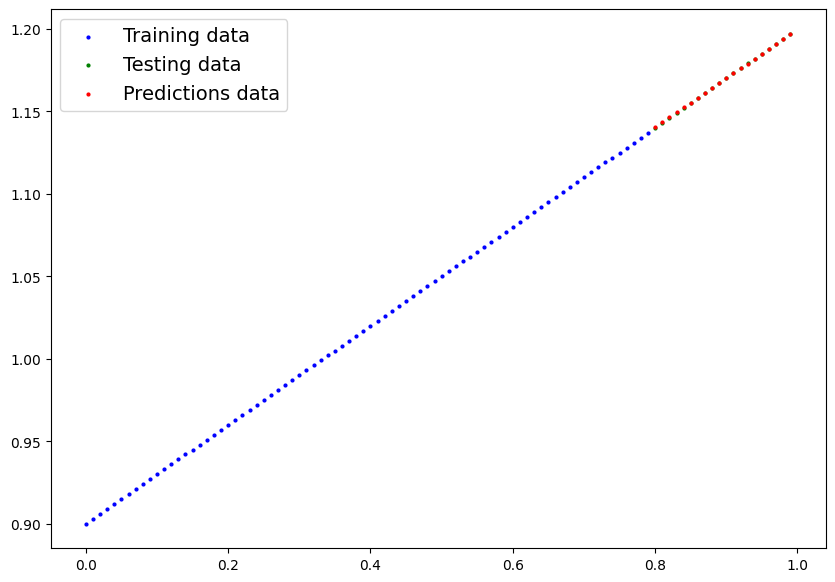

In [10]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)

plot_predictions(predictions=y_preds.cpu())

In [11]:
from pathlib import Path
# Create folder 
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# Create model name
MODEL_NAME = '01_pytorch_workflow_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# Save model
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model_2.pth


In [12]:
loaded_model_2 = LinearRegressionModelV3()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

LinearRegressionModelV3()

In [13]:
y_preds_new = loaded_model_2(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [14]:
class LinearRegressionModelV4(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [15]:
torch.manual_seed(100)
model_3 = LinearRegressionModelV4()
print(model_3.state_dict())
model_3.to(device)

OrderedDict([('linear_layer.weight', tensor([[-0.7767]])), ('linear_layer.bias', tensor([0.6317]))])


LinearRegressionModelV4(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [21]:
epochs = 300

for epoch in range(epochs):
    model_3.train()

    y_pred = model_3(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 20 == 0:
        model_3.eval()
        with torch.inference_mode():
            test_pred = model_3(X_test)
            test_loss = loss_fn(test_pred, y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 20 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 40 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 60 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 80 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 100 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 120 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 140 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 160 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 180 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 200 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 220 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 240 | Loss: 0.002246566116809845 | Test loss: 0.008510780520737171
Epoch: 260 | Loss: 0.002246566116809845 | Te

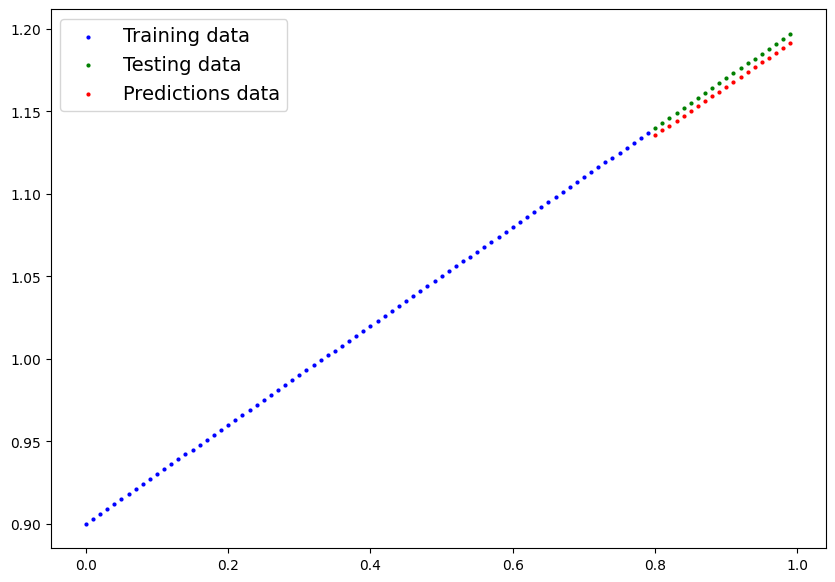

In [22]:
model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test)

plot_predictions(predictions=y_preds.cpu())

In [23]:
from pathlib import Path
# Create a folder
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# Create a model name
MODEL_NAME = '01_pytorch_workflow_model_3.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# Save model
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_3.pth


In [24]:
loaded_model_3 = LinearRegressionModelV4()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_3.to(device)

LinearRegressionModelV4(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [25]:
y_preds_new = loaded_model_3(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')